In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

2025-10-21 11:57:28.568646: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Paths
train_dir = "Data/train"  # Already split into categories
test_dir = "Data/test"
classes = ["Abnormal_Heartbeat", "Myocardial_Infarction", "History_Myocardial_Infarction", "Normal"]

In [3]:
# Check class distributions in train folder
class_counts = {c: len(os.listdir(os.path.join(train_dir, c))) for c in classes}
print("Train Class distributions:", class_counts)

Train Class distributions: {'Abnormal_Heartbeat': 699, 'Myocardial_Infarction': 956, 'History_Myocardial_Infarction': 516, 'Normal': 852}


In [4]:
# Check class distributions in test folder
class_counts_test = {c: len(os.listdir(os.path.join(test_dir, c))) for c in classes}
print("Test Class distributions:", class_counts_test)

Test Class distributions: {'Abnormal_Heartbeat': 233, 'Myocardial_Infarction': 239, 'History_Myocardial_Infarction': 172, 'Normal': 284}


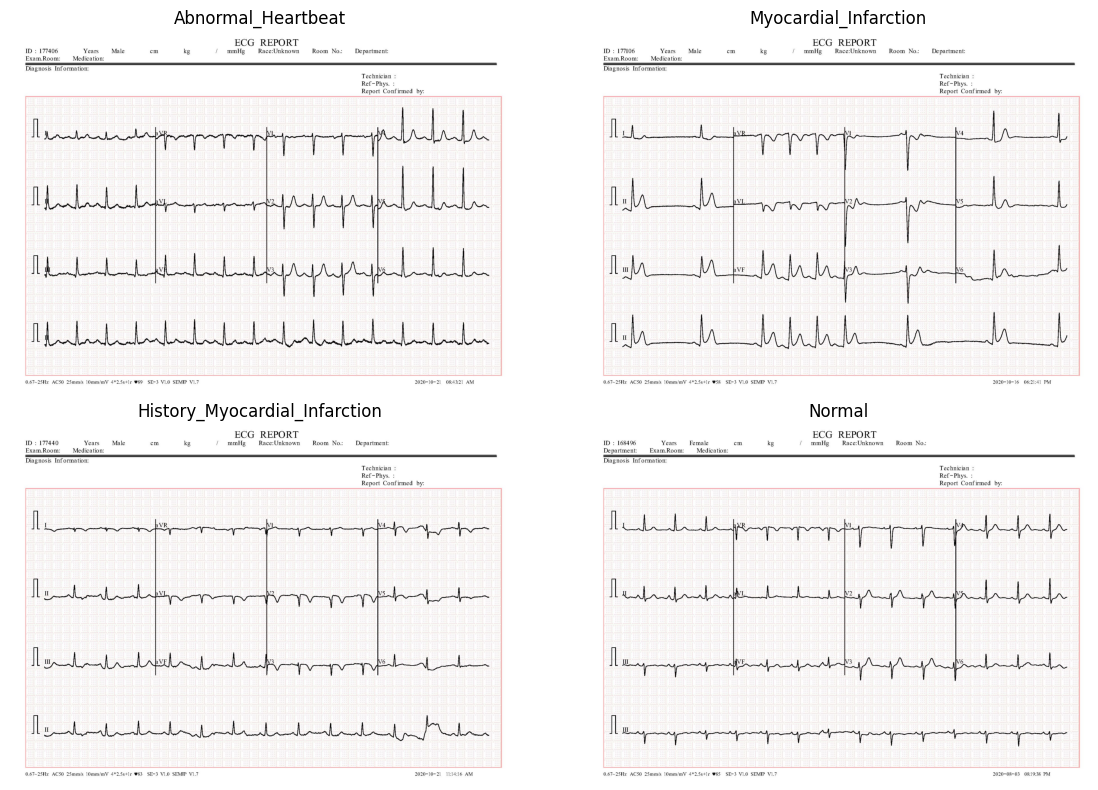

In [5]:
# Visualize sample images from train set
plt.figure(figsize=(12,8))
for i, c in enumerate(classes):
    img_path = os.path.join(train_dir, c, os.listdir(os.path.join(train_dir, c))[0])
    img = load_img(img_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(c)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Resize images for CNN input
IMG_HEIGHT, IMG_WIDTH = 1024, 2048  # maintain aspect ratio, minimally smaller than original


In [7]:
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    return img_array

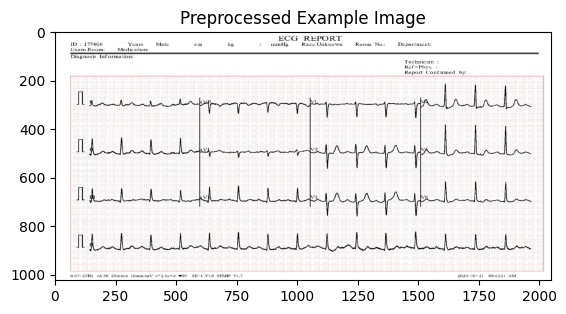

In [8]:
example_img_path = os.path.join(train_dir, "Abnormal_Heartbeat", os.listdir(os.path.join(train_dir, "Abnormal_Heartbeat"))[0])
example_img = preprocess_image(example_img_path)
plt.imshow(example_img)
plt.title("Preprocessed Example Image")
plt.show()

Found 2572 images belonging to 4 classes.
Found 451 images belonging to 4 classes.


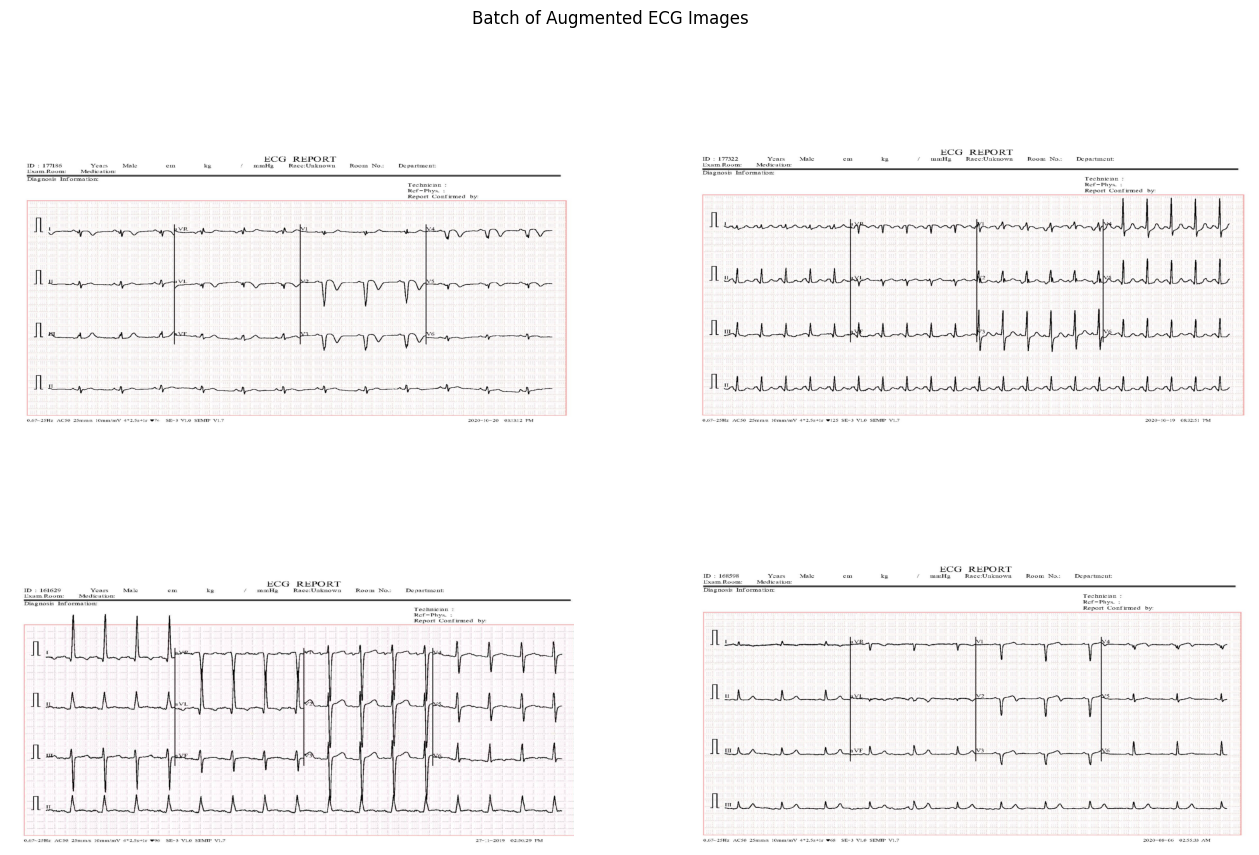

In [9]:
# Data generators with minimal augmentation (zoom 1-5%)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.05,   # 1-5% zoom only
    validation_split=0.15
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=8,  # small batch size due to large images
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)

# Visualize a batch
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(16,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle("Batch of Augmented ECG Images")
plt.show()